In [ ]:
#Нейро-нечеткие системы
#Лабораторная работа №4

#Задача: классификация текстов

In [1]:
#мешок слов

%matplotlib inline
import os

from ipywidgets import Select, SelectMultiple, interactive,  Layout, Box, Label

from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection
import sklearn.metrics as metrics


import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
from sklearn.model_selection import train_test_split
import sklearn.feature_selection 
import nltk
#перед использованием раскомментировать
# nltk.download("stopwords")
# nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivanchernov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ivanchernov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
##!pip install gensim==3.4.0
##!pip install smart_open==1.9.0
#import gensim

In [46]:
#оригинальный датасет
df = pd.read_csv("medium_post_titles.csv", delimiter=",")
# x = df.drop([yselect.value], axis = 1).copy() # accessibility
# df = df.fillna(0)
df.head(10)

,category,title,subtitle,subtitle_truncated_flag
0,work,"""21 Conversations"" - A fun (and easy) game for...",A (new?) Icebreaker game to get your team to s...,False
1,spirituality,"""Biblical Porn"" at Mars Hill",Author and UW lecturer Jessica Johnson talks a...,False
2,lgbtqia,"""CISGENDER?! Is That A Disease?!""","Or, a primer in gender vocabulary for the curi...",False
3,equality,"""Call me Nat Love"" :Black Cowboys and the Fron...",NaN,False
4,artificial-intelligence,"""Can I Train my Model on Your Computer?""",How we waste computational resources and how t...,False
5,cryptocurrency,"""Cypherpunks and Wall Street"": The Security To...",Bruce Fenton presents at the World Blockchain ...,False
6,politics,"""Diss"" vs. ""Piss"": The Blue Wave and Yellow Tr...",Michael Gofman & Matthew Wigler explore how bu...,False
7,health,"""Doctor, he's gone into shock!""",You've seen it in movies and on television. B...,False
8,culture,"""Happily Ever After: Fairy Tales for Every Chi...",Television shows have an invaluable opportunit...,False
9,poetry,"""I Love You"" The Dangerous Toxic Truth","The Big, Smelly Heap of Lies Pretending To Be ...",False


In [4]:
#выбрать столбец, который будет отвечать за тип
yselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
yselect

Select(description='Select file:', options=('category', 'title', 'subtitle', 'subtitle_truncated_flag'), value…

In [5]:
#выбрать столбец, который будет отвечать за текст
xselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
xselect

Select(description='Select file:', options=('category', 'title', 'subtitle', 'subtitle_truncated_flag'), value…

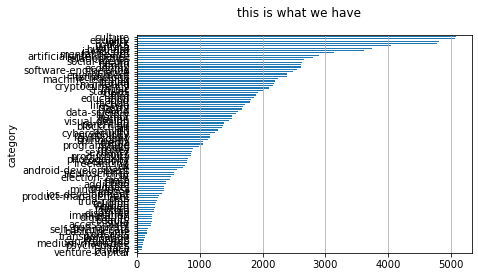

In [47]:
#просто смотрим какие у нас есть лейблы
fig, ax = plt.subplots()
fig.suptitle("this is what we have", fontsize=12)
df[yselect.value].reset_index().groupby(yselect.value).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()
аугментация

In [48]:
#препроцессинг
def preproc(text):
    #убираем пунктуацию
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    #токенизируем
    lst_text = text.split()
    
    #убираем стоп-слова
    stop_words = nltk.corpus.stopwords.words("english")
    lst_text = [word for word in lst_text if word not in 
                    stop_words]
                
    #стемминг
    ps = nltk.stem.porter.PorterStemmer()
    lst_text = [ps.stem(word) for word in lst_text]
                
    #лемматизация
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]
            
    #конец обработки
    text = " ".join(lst_text)
    return text

In [49]:
df["text_clean"] = df[xselect.value].apply(lambda x: preproc(x))
df["text_clean"].head(10)

0               21 convers fun easi game team get know
1                                 biblic porn mar hill
2                                       cisgend diseas
3    call nat love black cowboy frontier american f...
4                                   train model comput
5     cypherpunk wall street secur token revolut regul
6    dis v piss blue wave yellow trickl california ...
7                                 doctor he gone shock
8    happili ever fairi tale everi child underr hbo...
9                              love danger toxic truth
Name: text_clean, dtype: object

In [50]:
x = df["text_clean"].copy()
y = df[yselect.value].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [53]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,3))

In [54]:
corpus = x_train
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [55]:
dic_vocabulary

{'deploy': 2370,
 'control': 1893,
 'kubernet': 4895,
 'cluster': 1659,
 'kubernet cluster': 4896,
 'power': 6787,
 'way': 9565,
 'upgrad': 9256,
 'email': 2900,
 'market': 5455,
 'campaign': 1354,
 'email market': 2902,
 'realiti': 7182,
 'cant': 1371,
 'forc': 3459,
 'friendship': 3546,
 'swedish': 8561,
 'fish': 3394,
 'go': 3776,
 'digit': 2493,
 'harri': 4045,
 'potter': 6781,
 'kill': 4839,
 'anxieti': 496,
 'harri potter': 4046,
 'night': 6113,
 'wasteland': 9555,
 'father': 3248,
 'want': 9501,
 'product': 6907,
 'employe': 2926,
 'pay': 6496,
 'offlin': 6240,
 'appear': 538,
 'grand': 3883,
 'achiev': 210,
 'think': 8806,
 'render': 7338,
 'modal': 5748,
 'react': 7143,
 'leav': 5045,
 'neverland': 6034,
 'wakeup': 9484,
 'call': 1340,
 'everi': 3062,
 'parent': 6437,
 'need': 5944,
 'leav neverland': 5048,
 'wakeup call': 9485,
 'liber': 5112,
 'great': 3905,
 'juggl': 4766,
 'deal': 2254,
 'choos': 1557,
 'best': 897,
 'compani': 1767,
 'choos best': 1558,
 'tell': 8692,
 'm

In [58]:
len(set(dic_vocabulary.values()))

10000

Text(0.5, 1.0, 'Sparse Matrix Sample')

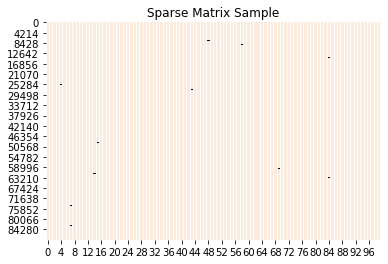

In [56]:
#карта слов
sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [28]:
#попытка уменьшить плотность матрицы
X_names = vectorizer.get_feature_names()
p_value_limit = 0.80
dtf_features = pd.DataFrame()
for cat in np.unique(y_train):
    chi2, p = feature_selection.chi2(X_train, y_train==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["y"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==cat]["feature"].values[:10]))
   print(" ")
    
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

# accessibility:
  . selected features: 352
  . top features: access,disabl,exclud,inclus,peopl disabl,web,web design,uplift,design,fluent
 
# addiction:
  . selected features: 500
  . top features: addict,alcohol,drink,drug,opioid,overdos,quit drink,recoveri,smoke,sober
 
# android-development:
  . selected features: 624
  . top features: android,android app,android develop,android studio,annot,app,app develop,app use,applic,architectur
 
# art:
  . selected features: 721
  . top features: art,art world,artist,artwork,contemporari,curat,da,da vinci,draw,exhibit
 
# artificial-intelligence:
  . selected features: 793
  . top features: adversari,ai,ai insid,ai research,algorithm,artifici,artifici intellig,artifici intellig ai,artifici intelligenceai,autom
 
# basic-income:
  . selected features: 294
  . top features: andrew yang,basic,basic incom,dividend,econom,incom,middl class,minimum wage,ontario,peopl color
 
# beauty:
  . selected features: 351
  . top features: beach,beauti,bodi,

  . top features: 2nd,2nd 2019,6th,camera,captur,imag,last updat,len,lens,photo
 
# podcasts:
  . selected features: 277
  . top features: audio,episod,guid help,itun,last coupl,last coupl year,learn make,listen,origin post,podcast
 
# poetry:
  . selected features: 667
  . top features: eye,haiku,lit,poem,poet,poetri,prose,sand,sonnet,tanka
 
# politics:
  . selected features: 1176
  . top features: alexandria,america,american,attorney gener,authoritarian,ballot,congress,constitut,court,democraci
 
# privacy:
  . selected features: 232
  . top features: consent,data privaci,data protect,data protect regul,first appear,gdpr,gener data,gener data protect,googl facebook,goto
 
# product-management:
  . selected features: 448
  . top features: agil,manag,manag team,pm,priorit,product,product manag,product owner,project manag,scrum
 
# productivity:
  . selected features: 682
  . top features: distract,get done,get thing,get thing done,goal,habit,inbox,morn routin,procrastin,product
 
# pr

In [29]:
classifier = naive_bayes.MultinomialNB()
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
model["classifier"].fit(X_train, y_train)

X_test = x_test
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)
                                

In [30]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("По классам:")
print(metrics.classification_report(y_test, predicted))
    

Accuracy: 0.24
По классам:


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

          accessibility       0.00      0.00      0.00        74
              addiction       0.00      0.00      0.00       123
    android-development       0.50      0.01      0.01       185
                    art       0.52      0.03      0.05       429
artificial-intelligence       0.37      0.40      0.38       835
           basic-income       0.00      0.00      0.00        62
                 beauty       0.00      0.00      0.00        78
             blockchain       0.74      0.06      0.11       428
                  books       0.00      0.00      0.00       282
               business       0.24      0.40      0.30      1155
                 cities       0.00      0.00      0.00       150
                 comics       0.70      0.03      0.06       244
             creativity       0.00      0.00      0.00       247
         cryptocurrency       0.58      0.39      0.47       668
                culture 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: The number of FixedLocator locations (31), usually from a call to set_ticks, does not match the number of ticklabels (93).

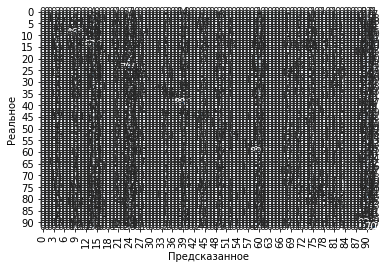

In [31]:
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Предсказанное", ylabel="Реальное", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.show()

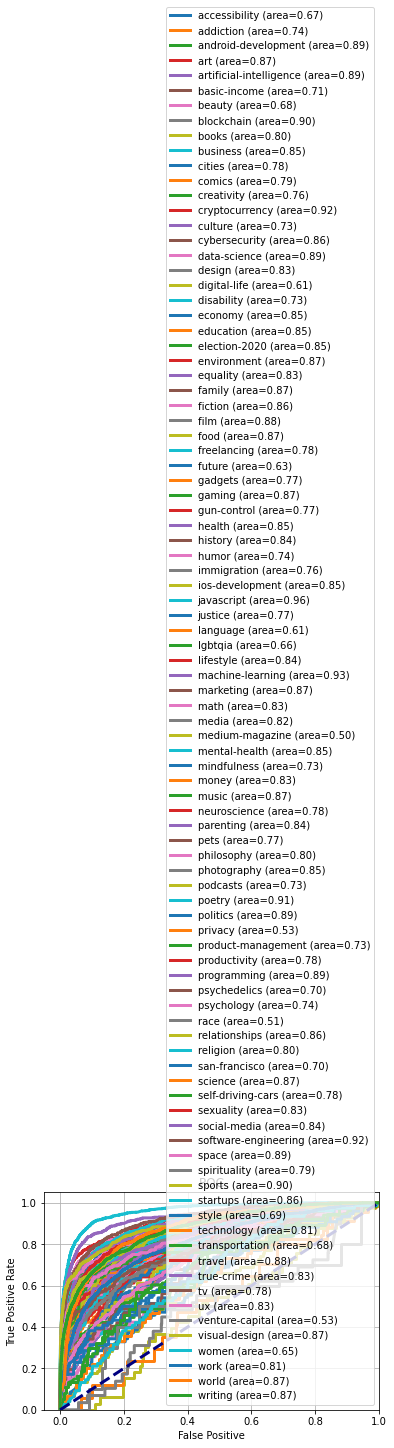

In [32]:
fig, ax = plt.subplots()
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive', 
          ylabel="True Positive Rate", 
          title="ROC")
ax.legend(loc="lower right")
ax.grid(True)
plt.show()

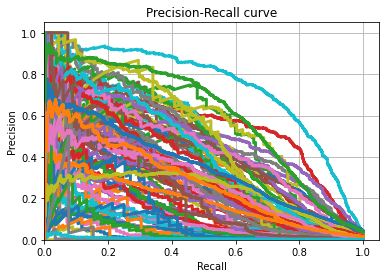

In [19]:
fig, ax = plt.subplots()
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax.plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
#ax.legend(loc="best")
ax.grid(True)
plt.show()

